In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import linalg as la
from scipy.optimize import curve_fit

In [3]:
def f(x):
    return x**3-6*x**2+7
def df(x):
    return 3*x**2-12*x

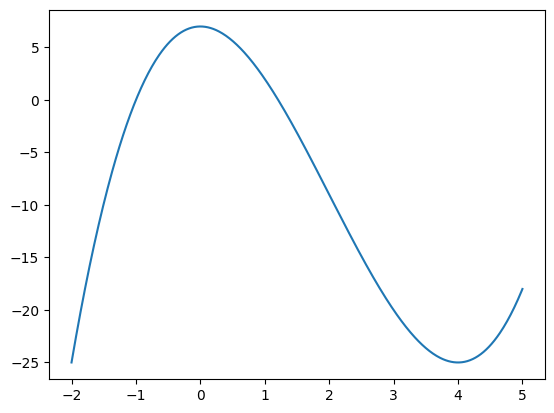

In [4]:
X = np.linspace(-2,5,500)
plt.plot(X,f(X))

In [22]:
dt = 0.05
xVals = [0]
yVals = [f(0)]
temp_x = xVals[-1]
for i in range(100):
    temp_y = f(temp_x)
    new_x = temp_x-dt*df(temp_x)
    new_y = f(new_x)
    if new_x==temp_x: 
        temp_x += dt
    elif new_y<temp_y:
        temp_x = new_x
        dt = 1.05*dt
        xVals.append(new_x)
        yVals.append(new_y)
    else:
        dt = 0.95*dt

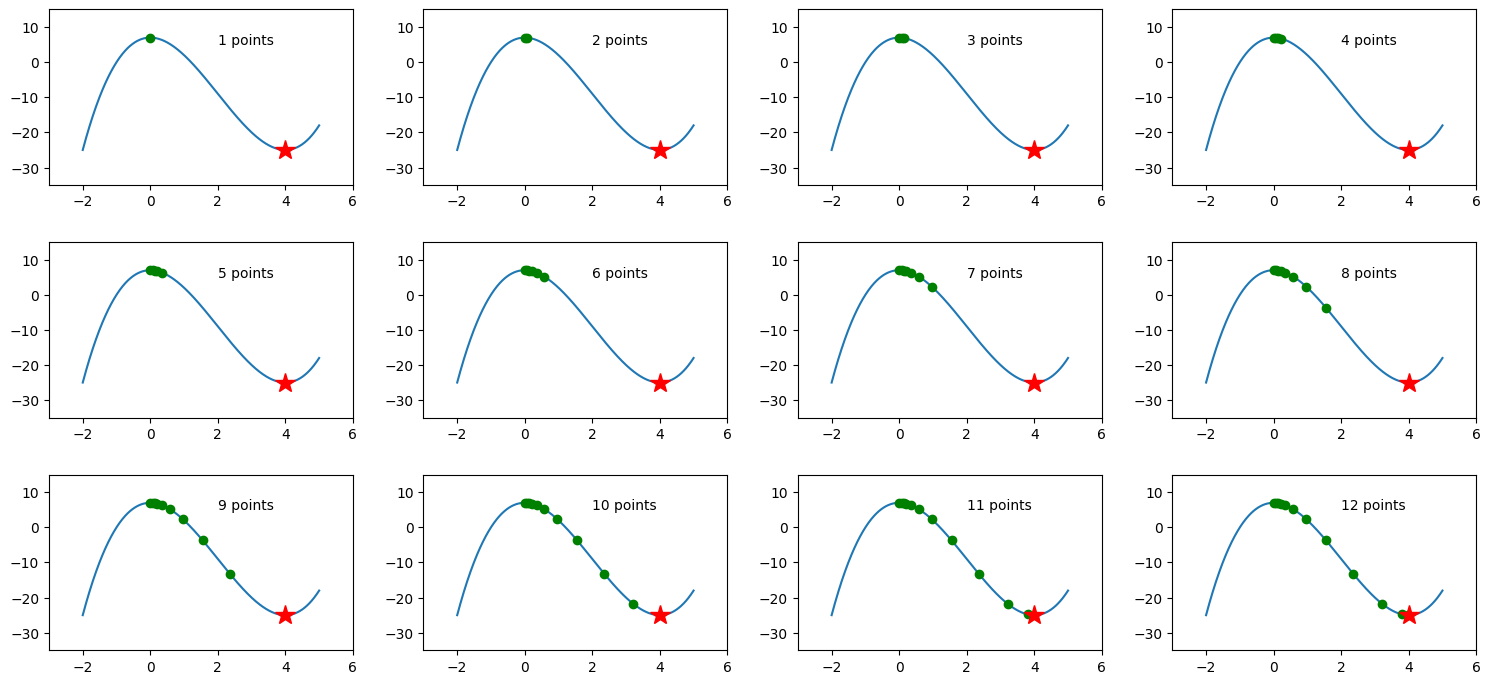

In [42]:
final = len(xVals)-1
step = int(final/12)
index = 1
GD_fig, GD_ax = plt.subplots(ncols=4, nrows=3,figsize=(15,7))
GD_fig.tight_layout(h_pad=2, w_pad=2)
for row in range(3):
    for col in range(4):
        GD_ax[row,col].plot(X,f(X))
        GD_ax[row,col].plot(xVals[:index],yVals[:index],"go")
        GD_ax[row,col].plot(xVals[final],yVals[final],"r*",markersize=15)
        GD_ax[row,col].set_xlim(-3,6)
        GD_ax[row,col].set_ylim(-35,15)
        GD_ax[row,col].annotate(str(index)+" points",(2,5))
        index = int(index+step)


In [43]:
# Here we import the data and assign each column of values to a variable:
# Notice that as columsn are assigned they are made Numpy arrays
df = pd.read_csv('../data/alcohol_calories.csv')
t = np.array(df['Alcohol'])
oz = np.array(df['oz'])
cal = np.array(df['calories'])
# This calculation creates a Numpy array of calories per oz
cal_per_ounce = cal/oz

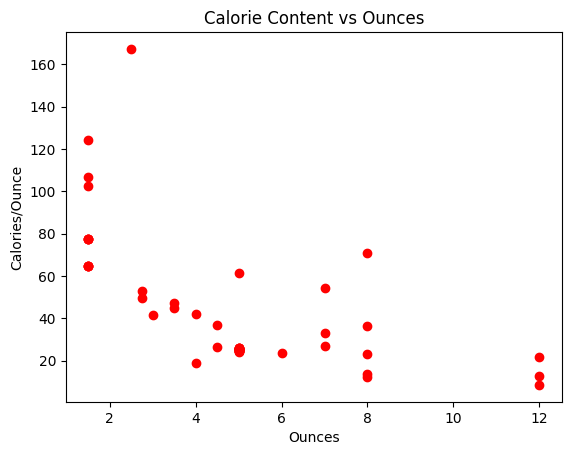

In [44]:
fig,ax = plt.subplots();
scatt_plot = ax.plot(oz,cal_per_ounce,"ro");
ax.set_title("Calorie Content vs Ounces");
ax.set_xlabel('Ounces');
ax.set_ylabel('Calories/Ounce');

In [45]:
# These create function representing arbitray linear and quadratic functions
def arb_linear(x,a,b): return a*x+b
def arb_quad(x,a,b,c): return a*x**2+b*x+c

In [46]:
lcoef,lcovar=curve_fit(arb_linear, oz, cal_per_ounce)
qcoef,qcovar=curve_fit(arb_quad, oz, cal_per_ounce)
print("%s+(%s)x"%(lcoef[1],lcoef[0]))

78.48637420798676+(-7.213475470184299)x


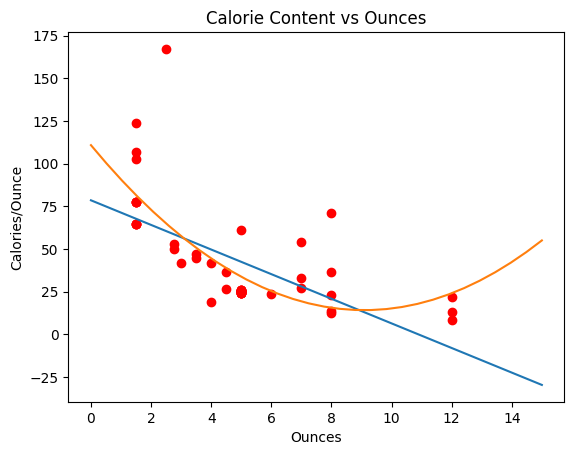

In [47]:
x=np.linspace(0,15,30)
line_approx = ax.plot(x,lcoef[0]*x+lcoef[1]);
quad_approx = ax.plot(x,qcoef[0]*x**2+qcoef[1]*x+qcoef[2]);
fig

In [51]:
def l(x,y,m,b):
    yp = arb_linear(x,m,b)
    dy = (y-yp)**2
    return np.mean(dy)

def dml(x,y,m,b):
    yp = arb_linear(x,m,b)
    dy = y-yp
    return 2*np.mean(dy*(-x))

def dbl(x,y,m,b):
    yp = m*x+b
    dy = y-yp
    return -2*np.mean(dy)

In [62]:
m = [0]
b = [25]
x = oz
y = cal_per_ounce
eta = 0.01
for i in range(2000):
    m.append(m[i]-eta*dml(x,y,m[i],b[i]))
    b.append(b[i]-eta*dbl(x,y,m[i],b[i]))
    if i%100 == 0:
        print(i,"\t:",b[-1],m[-1])
print("%s+(%s)x"%(b[i],m[i]))


0 	: 25.37751128038628 0.7986538461538462
100 	: 44.90022371376914 -1.8081623796353574
200 	: 57.21279795650708 -3.789732691290641
300 	: 65.01162226102186 -5.04486572870213
400 	: 69.9514227717529 -5.839871049651777
500 	: 73.08030837463689 -6.343429988425075
600 	: 75.06215462423089 -6.662385847130017
700 	: 76.31746244162431 -6.864413518508547
800 	: 77.11257846877915 -6.992378498265775
900 	: 77.61620752922053 -7.073431929870145
1000 	: 77.93520780321647 -7.124771435313784
1100 	: 78.1372636073839 -7.1572900439282225
1200 	: 78.2652464065405 -7.177887435684932
1300 	: 78.3463111250099 -7.19093389016917
1400 	: 78.3976577795904 -7.19919755658966
1500 	: 78.43018091649124 -7.204431789598459
1600 	: 78.45078117647917 -7.2077471696968605
1700 	: 78.46382944771031 -7.209847142162432
1800 	: 78.47209426486414 -7.211177271506662
1900 	: 78.47732922675121 -7.212019779730657
78.48059250532997+(-7.212544967707019)x


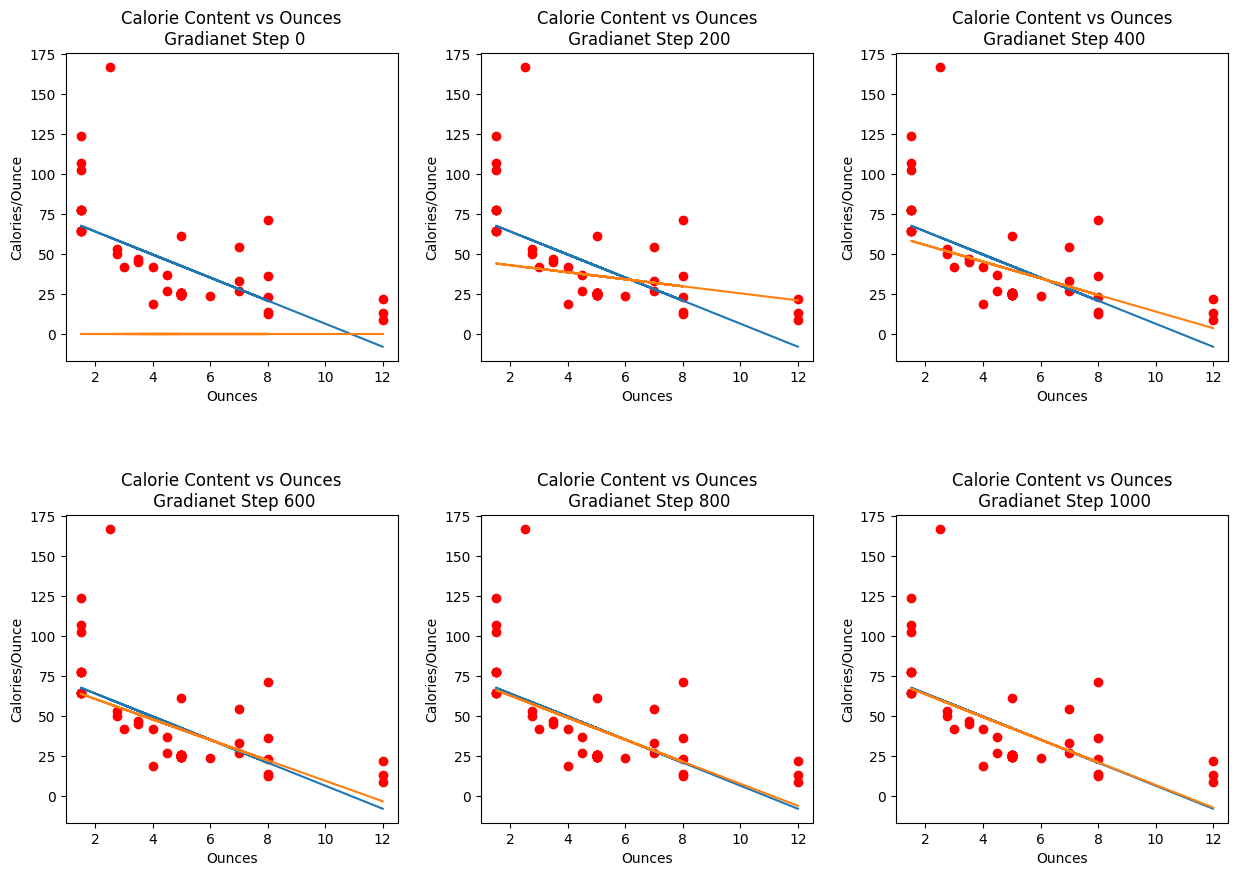

In [61]:
fig2,ax2 = plt.subplots(ncols=3,nrows=2,figsize=(15,10));
fig2.subplots_adjust(hspace=0.5,wspace=0.25)
for row in range(2):
    for col in range(3):
        n=(col+3*row)*(1000//5)
        ax2[row,col].plot(oz,cal_per_ounce,"ro");
        ax2[row,col].set_title("Calorie Content vs Ounces\n Gradianet Step %s"%n);
        ax2[row,col].set_xlabel('Ounces');
        ax2[row,col].set_ylabel('Calories/Ounce');
        ax2[row,col].plot(x,lcoef[0]*x+lcoef[1]);
        ax2[row,col].plot(x,m[n]*x+b[n]);